133.16613520408163
117.81194539678731


Text(0.5,1,'Auto')

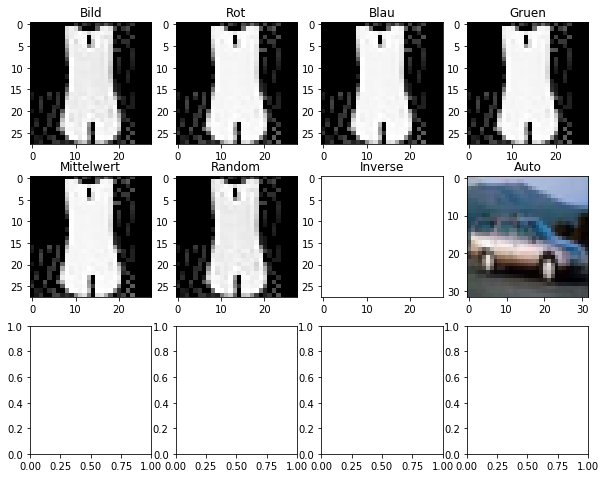

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 19 14:54:31 2018

@author: 6Zhilins
"""
import numpy as np
import pandas as pd
import time

# Aufgabe 1
import imageio
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')
fig, ax = plt.subplots(3, 4,figsize = (10,8))
outfile = imageio.imread('./outfile.png')
outfile_rot = outfile[:,:,0]

#2.
outfile_blau = outfile[:,:,1]
outfile_gruen = outfile[:,:,2]
outfile_rgb = outfile_rot/3 + outfile_blau/3 + outfile_gruen/3
    
outfile_mean = np.sum(outfile_rgb,axis=(0,1))/3
ax[0,0].imshow(outfile) #normal plotten
ax[0,0].set_title('Bild') #einen sinnvollen Titel setzen
# 3.
ax[0,1].imshow(outfile_rot, cmap='Greys_r') #normal plotten
ax[0,1].set_title('Rot') #einen sinnvollen Titel setzen
ax[0,2].imshow(outfile_blau, cmap='Greys_r') #normal plotten
ax[0,2].set_title('Blau') #einen sinnvollen Titel setzen
ax[0,3].imshow(outfile_gruen, cmap='Greys_r') #normal plotten
ax[0,3].set_title('Gruen') #einen sinnvollen Titel setzen
ax[1,0].imshow(outfile_rgb, cmap='Greys_r') #normal plotten
ax[1,0].set_title('Mittelwert') #einen sinnvollen Titel setzen
# 4. 
outfile_shuffle = outfile.copy()
outfile_shuffle[:,:,0] = outfile[:,:,1]
outfile_shuffle[:,:,1] =outfile[:,:,2]
outfile_shuffle[:,:,2] = outfile[:,:,0]
# TODO: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html
ax[1,1].imshow(outfile_shuffle) #normal plotten
ax[1,1].set_title('Random') #einen sinnvollen Titel setzen

#5. Negativ
ax[1,2].imshow(255-outfile) #normal plotten
ax[1,2].set_title('Inverse')
#6.
print(np.mean(outfile))
print(np.std(outfile))

#2. Laden der Daten:
d = np.load('./trainingsDatenFarbe2.npz')
train_imgs = d['data']
train_labels = d['labels']

t = np.load('./validierungsDatenFarbe2.npz')
test_imgs = t['data']
test_labels = t['labels']

ax[1,3].imshow(train_imgs[0]) #normal plotten
ax[1,3].set_title('Auto')

In [7]:
#2. Berechnet zu jedem Bild den Mittelwert als Merkmal.
np.mean(train_imgs,(3,2,0))

NameError: name 'train_imgs' is not defined

In [ ]:
#3. Nutzt das Merkmal/die Merkmale als Deskriptor und findet zu jedem Bild aus den Validierungsdaten das am besten passende Bild aus den Trainingsdaten und speichert das entsprechende Label als Vorhersage. Vergleicht dazu die jeweiligen Deskriptoren und berechnet den Abstand mit der L2-Distanz (Euklidische Distanz).
np.mean(test_imgs,(3,2,0))

In [ ]:

#5. Zusatzaufgabe: Nutzt auch die Standardabweichung und kombiniert beide Merkmale zu einem Deskriptor. Bringt die gewichtete Distanzbe- rechnung einen Vorteil?

In [ ]:
#1.3. 
def predict_mean(train,test,train_labels):
    # Ein Array Umwandeln in 2D und dabei die erste Reihe wiederholen.
    test_matrix = np.tile(test,([len(train),1])).T
    # Euklidische Distanz ausrechnen (Absolute umgeht Wurzel und Quadrat)
    test_distance_matrix = np.absolute(test_matrix - train)
    # Indice der kleinsten Werte anzeigen lassen
    indices = np.argmin(test_distance_matrix,1) 
    # Werte der Indice ausgeben
    
    return np.take(train_labels, indices)

In [ ]:
#1.4.
test_data_mean = np.mean(test_imgs,(1,2,3))
train_data_mean = np.mean(train_imgs,(1,2,3))
prediction_labels =  predict_mean(train_data_mean,test_data_mean,train_labels)
np.mean(prediction_labels == test_labels)

# Das Ergebnis ist inakzeptabel da es größer als 1/3 sein sollte.

In [ ]:
#1.5
train_data_std = np.std(train_imgs,axis=(1,2,3))
test_data_std = np.std(test_imgs,axis=(1,2,3))
train_mean_std = np.column_stack((train_data_mean,train_data_std))
test_mean_std = np.column_stack((test_data_mean,test_data_std))

def predict_mean_std(train,test,train_labels):
    test_matrix = np.tile(test, (30,2,1,))
    train_matrix = np.tile(train,(len(test))).reshape((30, 60, 2))
    # Euklidische Distanz ausrechnen (Absolute umgeht Wurzel und Quadrat)
    test_distance_matrix = np.absolute(test_matrix-train_matrix).sum(axis=2)
    # Indice der kleinsten Werte anzeigen lassen
    indices = np.argmin(test_distance_matrix,1) 
    # Werte der Indice ausgeben
    prediction_labels = np.take(train_labels, indices)
    return prediction_labels

prediction_labels = predict_mean_std(train_mean_std, test_mean_std, train_labels)
np.mean(prediction_labels == test_labels)
# Das Ergebnis ist besser da es größer als 1/3 ist.

In [ ]:
def predict(test_imgs,train_imgs,train_labels,test_labels,bins = 8):
    train_data_histo = []
    for img in train_imgs:
        img = img.reshape((img.shape[0]*img.shape[1],3))
        histo = np.histogramdd(img, bins = [bins,bins,bins], range=((0,256),(0,256),(0,256)))[0]
        train_data_histo.append(histo)

    test_data_histo = []
    for img in test_imgs:
        img = img.reshape((img.shape[0]*img.shape[1],3))
        histo = np.histogramdd(img, bins = [bins,bins,bins], range=((0,256),(0,256),(0,256)))[0]
        test_data_histo.append(histo)

    euclidean_distance = []
    for test_img in test_data_histo:
        result = []
        for train_img in train_data_histo:
            result.append(np.linalg.norm(test_img - train_img))
        euclidean_distance.append(result)
    indices = np.argmin(euclidean_distance,1) 
    # Werte der Indice ausgeben
    prediction_labels = np.take(train_labels, indices)
    return prediction_labels

In [ ]:
success = 0
for bin_num in range(1,256):
    predicted_labels = predict(test_imgs,train_imgs,train_labels,test_labels,bins = bin_num)
    rate = np.mean(predicted_labels == test_labels)
    if rate > success:
        success = rate
        success_bin = bin_num
        prediction = predicted_labels

In [ ]:
success_bin